# Supervised Classification Project

This project focuses on supervised classification using the Iris dataset. We will employ five different machine learning algorithms: Random Forest (RF), Decision Trees (DT), Logistic Regression (LR), Vector Space Model (VSM), and k-Nearest Neighbors (KNN) to classify iris flower species. This classification project aims to compare the performance of these algorithms on the Iris dataset.

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [77]:
from sklearn.datasets import load_iris
iris=load_iris()
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['Target']=iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Exploration

In [78]:
data.shape

(150, 5)

In [79]:
data.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [80]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [81]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Target                 int32
dtype: object

In [82]:
#unique values
l={}
for col in data.columns:
    unique=data[col].unique()
    l[col]={'Unique values':unique,'Length of feature':len(unique)}
for i,info in l.items():
        print("feature :",i)
        print("unique values :",info['Unique values'])
        print("length of feature :",info['Length of feature'])




feature : sepal length (cm)
unique values : [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
length of feature : 35
feature : sepal width (cm)
unique values : [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
length of feature : 23
feature : petal length (cm)
unique values : [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
length of feature : 43
feature : petal width (cm)
unique values : [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
length of feature : 22
feature : Target
unique values : [0 1 2]
length of feature : 3


### Data Preprocessing

In [83]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [84]:
#Outliers
for column in data.columns:
    if data.dtypes[column]!='object':
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
print("outliers = ",outliers)


outliers =  Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), Target]
Index: []


### Data Analysis

In [85]:
#correlation 
df=data.corr()

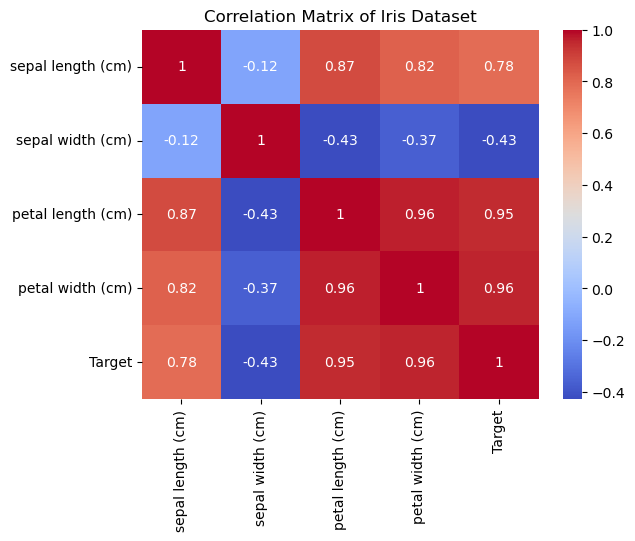

In [86]:
sns.heatmap(df,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

In [87]:
d={0:'setosa',1:'versicolour',2:'virginica'}
for key,value in d.items():
    data.loc[data['Target']==key,'target name']=value

<function matplotlib.pyplot.show(close=None, block=None)>

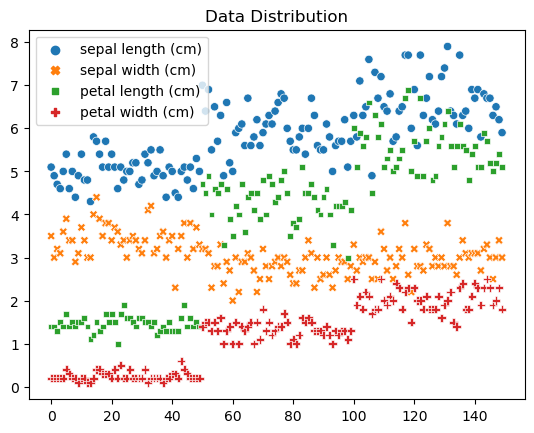

In [88]:

newdata=data.drop('Target',axis=1)
sns.scatterplot(data=newdata)
plt.title("Data Distribution")
plt.show

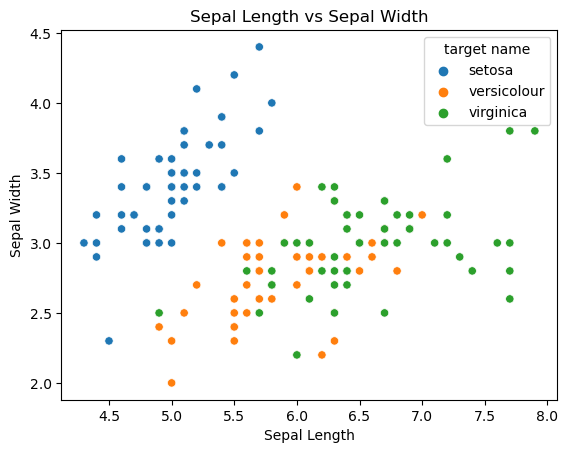

In [89]:
sns.scatterplot(x=data['sepal length (cm)'],y=data['sepal width (cm)'],hue=data['target name'])
plt.title("Sepal Length vs Sepal Width")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

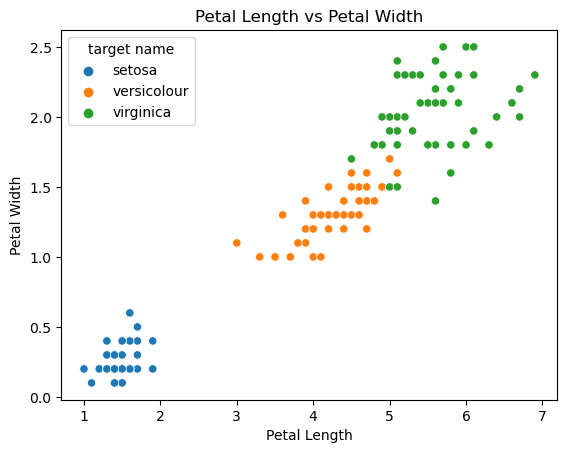

In [90]:
sns.scatterplot(x=data['petal length (cm)'],y=data['petal width (cm)'],hue=data['target name'])
plt.title("Petal Length vs Petal Width")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Creating ML Models

### Importing Necessary Libraries

In [91]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [92]:
#splitting training and testing data
X=iris.data
y=iris.target

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=2)


### Logistics regression

In [94]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\babua\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [96]:
#Evaluating the model performance
score=accuracy_score(y_test,y_pred)
score

0.9777777777777777

In [97]:
report=classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [98]:
#confusin matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

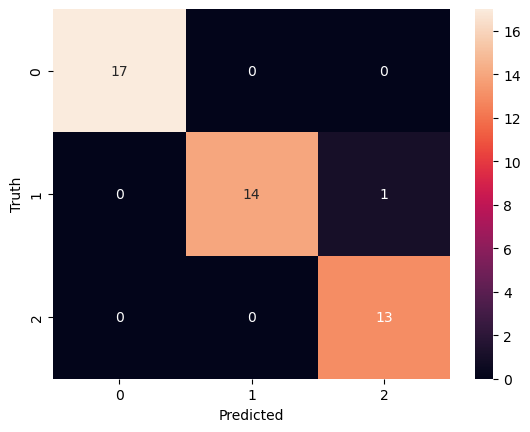

In [99]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Decison Tree

In [100]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
y_pred=dt.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [102]:
#Evaluating the model performance
score=accuracy_score(y_test,y_pred)
score

0.9555555555555556

In [103]:
report=classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Random Forest

In [104]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [106]:
#Evaluating the model performance
score=accuracy_score(y_test,y_pred)
score

0.9777777777777777

In [107]:
report=classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### KNN

In [108]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [109]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [110]:
#Evaluating the model performance
score=accuracy_score(y_test,y_pred)
score

1.0

In [111]:
report=classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### SVM

In [112]:
svm=SVC()
svm.fit(X_test,y_test)

SVC()

In [113]:
y_pred=svm.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [114]:
#Evaluating the model performance
score=accuracy_score(y_test,y_pred)
score

0.9333333333333333

In [115]:
report=classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      0.93      0.90        15
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### Building SVM model using tuning technique

In [116]:
para_grid={'C':[.1,1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto']}
grid_search=GridSearchCV(svm,para_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [117]:
best_para=grid_search.best_params_
best_model=grid_search.best_estimator_
print("Best Parameter : ",best_para)
print("Best Model : ",best_model)

Best Parameter :  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Model :  SVC(C=1, gamma='auto')


In [118]:
#Implementing the best Model
svm=SVC(C=1,kernel='linear',gamma='scale')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [119]:
#Evaluating the model performance
score=accuracy_score(y_test,y_pred)
score

1.0

In [120]:
report=classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Judging by the accuracy scores we've seen, it seems that all the models are doing quite well. Notably, both the KNN and SVM models have achieved a remarkable 100% accuracy rate.

### Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [123]:
y_pred=nb.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [124]:
#Evaluating the model performance
score=accuracy_score(y_test,y_pred)
score

0.9777777777777777

In [125]:
report=classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### K Means

In [126]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [127]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Elbow Plot

In [128]:
sse=[]
k=range(1,15)
for i in k:
    km=KMeans(n_clusters=i)
    km.fit(X_train)
    sse.append(km.inertia_)

C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

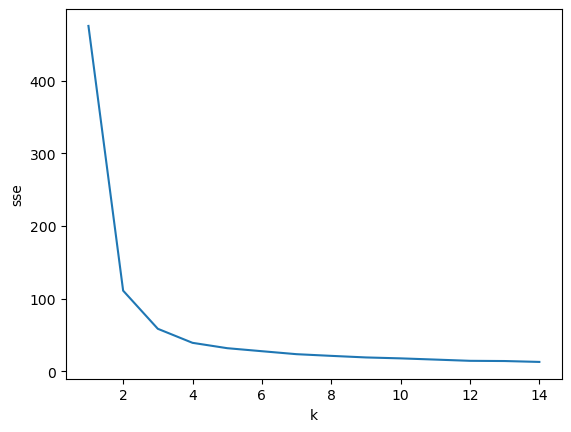

In [129]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k,sse)

from the elbow plot we got value of k=3


In [130]:
#building model using k=3
kmm=KMeans(n_clusters=3)
y_pred=kmm.fit_predict(X_scaled)
y_pred

C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [131]:
silhouette_score(X, kmm.labels_)

0.5061527484935539

In [132]:
kmm.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [135]:
data['cluster']=y_pred

In [136]:
data.cluster.unique()

array([0, 1, 2])

In [137]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]

In [139]:
kmm.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

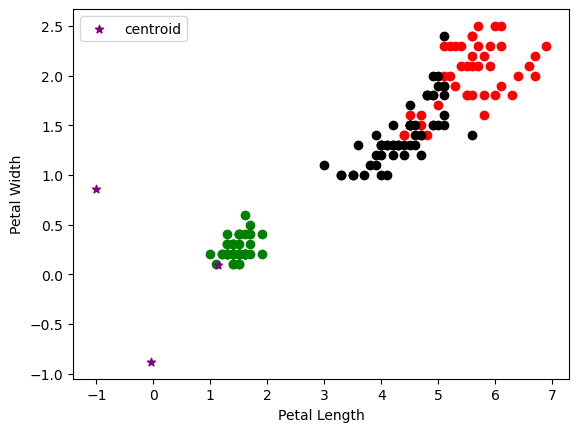

In [140]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(kmm.cluster_centers_[:,0],kmm.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()